In [1]:
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
import numpy as np

# from matplotlib.mlab import bivariate_normal

import cartopy.crs as ccrs
import xarray as xr

import math

import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker
import matplotlib.gridspec as gridspec

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

from IPython.display import Image

from tqdm import tqdm
import os 

In [57]:
ERA5_DJF  = xr.open_dataset('/n/home12/hongwei/Paper_2/UVW_DJF.nc')
ERA5_JJA  = xr.open_dataset('/n/home12/hongwei/Paper_2/UVW_JJA.nc')

ERA5_DJF

<xarray.Dataset>
Dimensions:    (latitude: 241, level: 4, longitude: 1440, time: 24)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * level      (level) int32 30 50 70 100
  * time       (time) datetime64[ns] 2001-01-01 2001-02-01 ... 2008-12-01
Data variables:
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
    w          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-09-29 15:08:55 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [58]:
U_DJF = ERA5_DJF["u"].mean(["time","longitude"])
V_DJF = ERA5_DJF["v"].mean(["time","longitude"])
W_DJF = ERA5_DJF["w"].mean(["time","longitude"])

U_JJA = ERA5_JJA["u"].mean(["time","longitude"])
V_JJA = ERA5_JJA["v"].mean(["time","longitude"])
W_JJA = ERA5_JJA["w"].mean(["time","longitude"])

LAT = ERA5_DJF["latitude"]
W_DJF

<xarray.DataArray 'w' (level: 4, latitude: 241)>
array([[ 1.23535458e-04,  1.15867442e-04,  1.09400797e-04,
         1.03593571e-04,  9.72764465e-05,  9.07025460e-05,
         8.52299781e-05,  8.09884368e-05,  7.70250699e-05,
         7.26957005e-05,  6.80362646e-05,  6.34633907e-05,
         5.89688352e-05,  5.43602073e-05,  5.02401308e-05,
         4.61965283e-05,  4.18057098e-05,  3.75543714e-05,
         3.38634309e-05,  3.07413138e-05,  2.81067205e-05,
         2.51052461e-05,  2.15117507e-05,  1.77481652e-05,
         1.39666035e-05,  1.05614408e-05,  7.08122707e-06,
         2.74716808e-06, -1.85165186e-06, -6.05111927e-06,
        -1.00095622e-05, -1.38599025e-05, -1.79395520e-05,
        -2.19021404e-05, -2.56288495e-05, -2.96025737e-05,
        -3.36956073e-05, -3.73150324e-05, -4.04878883e-05,
        -4.38333191e-05, -4.75305715e-05, -5.17963708e-05,
        -5.63171016e-05, -6.11165233e-05, -6.58543358e-05,
        -7.02983234e-05, -7.47724116e-05, -7.92948267e-05,
        -8.35240789e-05, -8.77461716e-05, -9.18929800e-05,
        -9.57943776e-05, -9.96026865e-05, -1.03638675e-04,
        -1.07812768e-04, -1.12161841e-04, -1.16319003e-04,
        -1.19859033e-04, -1.22666155e-04, -1.25195133e-04,
...
        -8.84754700e-04, -8.72234290e-04, -8.61542474e-04,
        -8.55287886e-04, -8.42045352e-04, -8.28260207e-04,
        -8.15331819e-04, -8.00516456e-04, -7.92162667e-04,
        -7.91502942e-04, -7.91218888e-04, -7.85523735e-04,
        -7.75404973e-04, -7.65616307e-04, -7.57368689e-04,
        -7.48401391e-04, -7.42494885e-04, -7.40807154e-04,
        -7.39395269e-04, -7.41306343e-04, -7.45791534e-04,
        -7.44293618e-04, -7.35439884e-04, -7.25897204e-04,
        -7.16311799e-04, -7.07141764e-04, -7.04792445e-04,
        -7.07675819e-04, -7.09395856e-04, -7.07772560e-04,
        -7.04134756e-04, -6.96887146e-04, -6.83988270e-04,
        -6.72324735e-04, -6.68152526e-04, -6.67649962e-04,
        -6.61555037e-04, -6.48910762e-04, -6.39361504e-04,
        -6.32118550e-04, -6.19362923e-04, -6.00420521e-04,
        -5.79523679e-04, -5.60442510e-04, -5.41896559e-04,
        -5.22804970e-04, -5.05864271e-04, -4.90696228e-04,
        -4.70298517e-04, -4.43690456e-04, -4.16124822e-04,
        -3.88998975e-04, -3.57655896e-04, -3.20255844e-04,
        -2.87682051e-04, -2.61971436e-04, -2.39473025e-04,
        -2.17815905e-04]], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * level     (level) int32 30 50 70 100

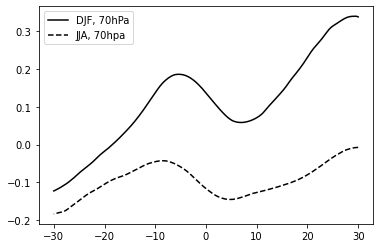

In [77]:
# plt.plot(LAT, V_DJF[0,:],'r-', label='DJF, 30hPa')
# plt.plot(LAT, V_JJA[0,:],'r--', label='JJA, 30hPa')

# plt.plot(LAT, V_DJF[1,:],'b-', label='DJF, 50hPa')
# plt.plot(LAT, V_JJA[1,:],'b--', label='JJA, 50hpa')

plt.plot(LAT, V_DJF[2,:],'k-', label='DJF, 70hPa')
plt.plot(LAT, V_JJA[2,:],'k--', label='JJA, 70hpa')

# plt.plot(LAT, V_DJF[3,:],'y-', label='DJF, 100hPa')
# plt.plot(LAT, V_JJA[3,:],'y--', label='JJA, 100hpa')

plt.legend();

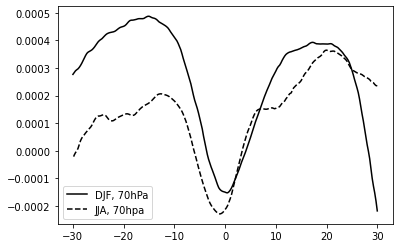

In [78]:
# plt.plot(LAT, -W_DJF[0,:],'r-', label='DJF, 30hPa')
# plt.plot(LAT, -W_JJA[0,:],'r--', label='JJA, 30hPa')

# plt.plot(LAT, -W_DJF[1,:],'b-', label='DJF, 50hPa')
# plt.plot(LAT, -W_JJA[1,:],'b--', label='JJA, 50hpa')

plt.plot(LAT, -W_DJF[2,:],'k-', label='DJF, 70hPa')
plt.plot(LAT, -W_JJA[2,:],'k--', label='JJA, 70hpa')

# plt.plot(LAT, -W_DJF[3,:],'y-', label='DJF, 100hPa')
# plt.plot(LAT, -W_JJA[3,:],'y--', label='JJA, 100hpa')

plt.legend();

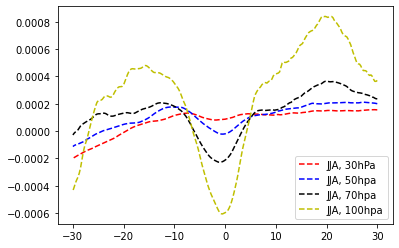

In [72]:
# plt.plot(LAT, -W_DJF[0,:],'r-', label='DJF, 30hPa')
plt.plot(LAT, -W_JJA[0,:],'r--', label='JJA, 30hPa')

# plt.plot(LAT, -W_DJF[1,:],'b-', label='DJF, 50hPa')
plt.plot(LAT, -W_JJA[1,:],'b--', label='JJA, 50hpa')

# plt.plot(LAT, -W_DJF[2,:],'k-', label='DJF, 70hPa')
plt.plot(LAT, -W_JJA[2,:],'k--', label='JJA, 70hpa')

# plt.plot(LAT, -W_DJF[3,:],'y-', label='DJF, 100hPa')
plt.plot(LAT, -W_JJA[3,:],'y--', label='JJA, 100hpa')

plt.legend();

In [37]:
U_Feb = np.mean(U[0:16:2,:,:], axis=0)
U_Aug = np.mean(U[1:16:2,:,:], axis=0)

V_Feb = np.mean(V[0:16:2,:,:], axis=0)
V_Aug = np.mean(V[1:16:2,:,:], axis=0)

W_Feb = np.mean(W[0:16:2,:,:], axis=0)
W_Aug = np.mean(W[1:16:2,:,:], axis=0)

U_Feb.shape, U_Aug.shape

((2, 241), (2, 241))

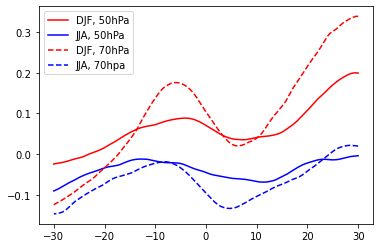

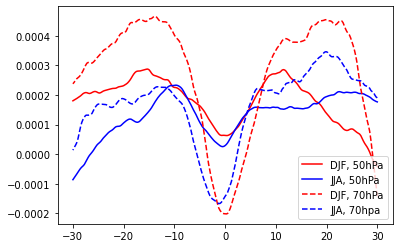

In [48]:
plt.plot(LAT, -W_Feb[0,:],'r-', label='DJF, 50hPa')
plt.plot(LAT, -W_Aug[0,:],'b-', label='JJA, 50hPa')

plt.plot(LAT, -W_Feb[1,:],'r--', label='DJF, 70hPa')
plt.plot(LAT, -W_Aug[1,:],'b--', label='JJA, 70hpa')

plt.legend();

In [ ]:
ERA5_red  = xr.open_dataset('/n/home12/hongwei/Paper_2/UVW_30_hPa_70hPa.nc')

U_red = ERA5_red["u"].mean(["longitude","latitude"])
V_red = ERA5_red["v"].mean(["longitude","latitude"])
W_red = ERA5_red["w"].mean(["longitude","latitude"])
Z_red = ERA5_red["z"].mean(["longitude","latitude"])

U_abs_red = abs(ERA5_red["u"]).mean(["longitude","latitude"])
V_abs_red = abs(ERA5_red["v"]).mean(["longitude","latitude"])
W_abs_red = abs(ERA5_red["w"]).mean(["longitude","latitude"])

U_red_N = np.mean( ERA5_red["u"][:,0:41,:], axis=(1,2) )
V_red_N = np.mean( ERA5_red["v"][:,0:41,:], axis=(1,2) )
W_red_N = np.mean( ERA5_red["w"][:,0:41,:], axis=(1,2) )
Z_red_N = np.mean( ERA5_red["z"][:,0:41,:], axis=(1,2) )

U_red_S = np.mean( ERA5_red["u"][:,41::,:], axis=(1,2) )
V_red_S = np.mean( ERA5_red["v"][:,41::,:], axis=(1,2) )
W_red_S = np.mean( ERA5_red["w"][:,41::,:], axis=(1,2) )
Z_red_S = np.mean( ERA5_red["z"][:,41::,:], axis=(1,2) )